# Поведение пользователей мобильного приложения

Будет проведена аналитика поведения пользователей мобильного приложения. 

Основная цель проекта - изучить воронку продаж и выяснить, как и сколько пользователей доходят до покупки. Так же будут проведены A/A/B-тесты по лояльности пользователей к новым элементам дизайна (изменение шрифта).

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, мы можем быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

# Этапы и цели проекта

- **Импорт и подготовка данных;**
- **Изучение и проверка данных;**
- **Изучение и анализ воронки событий;**
- **Анализ результатов А/А/В-экспеременета.**

### Описание данных
Файл moscow_places.csv:

- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
    - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.

### Шаг 1. Импорт библиотек и просмотр общих данных

**Импорт библиотек.**

In [15]:
import pandas as pd #для обработки и анализа данных
import numpy as np #поддержка таблиц и математических функций
import datetime as dt #для работы с датой и временем
from datetime import datetime, timedelta #для проведений манипуляций и расчетов со временем и отображения продолжительности времени
from matplotlib import pyplot as plt #для визуализации данных
import scipy.stats as stats #выполнение статистических расчетов
import math as mth

**Загрузка данных.**

In [16]:
data = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\logs_exp.csv')#загрузка данных, изменение разделителя
display(data);
data.info();

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


### Шаг 2. Подготовка данных.

**Переименовываем столбцы и удаляем дубликаты**

In [17]:
data = data.rename(columns = {'EventName':'event', 'DeviceIDHash':'device_id', 'EventTimestamp':'еvent_tstamp', 'ExpId':'group'})
print(f'Дубликаты: {data.duplicated().sum()}')
display(data)
data.info()

Дубликаты: 413


,event,device_id,еvent_tstamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   event         244126 non-null  object
 1   device_id     244126 non-null  int64 
 2   еvent_tstamp  244126 non-null  int64 
 3   group         244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [18]:
data = data[~data.duplicated(keep=False)]
print(f'Дубликаты: {data.duplicated().sum()}')

Дубликаты: 0


Дубликаты обнаружены и убраны из отчета.

**Проверка на наличие пропусков в колонках и изменение типов данных**

In [19]:
NaNs = np.where(pd.isnull(data))#поиск координат (строк и столбцов) NaN
NaNs = np.array(NaNs).tolist()#преобразования массивов в списки координат
nans_columns = NaNs[1]#выборка столбцов
nans_columns = list(set(nans_columns))#преобразование множеств в список
#print(nans_columns)
data_column_name = data.columns.values#находим названия столбцов в дф
print(data_column_name[nans_columns])#смотрим названия столбцов с NaNsами
display(data)


[]


,event,device_id,еvent_tstamp,group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


Пропуски не найдены, идем дальше.

**Изменение типов данных и названий групп**

In [20]:
data['еvent_tstamp'] = pd.to_datetime(data['еvent_tstamp'], unit='s') #изменим тип данных на дейттайм
data['date'] =data['еvent_tstamp'].dt.date #Создадим колонку дейт. Возможно, время нам не понадобится
display(data)

,event,device_id,еvent_tstamp,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [21]:
print(data['event'].unique())#Посмотрим основные события 
print(data['group'].unique())#Посмотрим основные id групп A/A/B-тестов

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[246 248 247]


Заменим названия групп.

In [22]:
#Переименуем названия групп для лучшей читабельности
data['group'] = data['group'].replace(246,'A1') 
data['group'] = data['group'].replace(247,'A2')
data['group'] = data['group'].replace(248,'B')
display(data)

,event,device_id,еvent_tstamp,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07


На всякий случай очистим группы от девайсов, которые могли попасть в несколько групп.

In [23]:
#доля девайсов, попавших более чем в одну группу
bad_devices = data.groupby('device_id').agg({'group' : 'nunique'}).reset_index().query('group>1')['device_id']

# отфильтровали по ним
data = data.query('device_id not in @bad_devices')

Проверим, что группы распределены равномерно:

In [24]:
A1_exp = (data[data['group']=='A1'].count()/data['group'].count())*100
A2_exp = (data[data['group']=='A2'].count()/data['group'].count())*100
B_exp = (data[data['group']=='B'].count()/data['group'].count())*100

print('A1:', A1_exp, '\n', '\n', 'A2:', A2_exp, '\n', '\n', 'B:', B_exp);

A1: event           32.905842
device_id       32.905842
еvent_tstamp    32.905842
group           32.905842
date            32.905842
dtype: float64 
 
 A2: event           31.986621
device_id       31.986621
еvent_tstamp    31.986621
group           31.986621
date            31.986621
dtype: float64 
 
 B: event           35.107537
device_id       35.107537
еvent_tstamp    35.107537
group           35.107537
date            35.107537
dtype: float64


Пропусков нет. Дубликаты сброшены. Требовалась замена типа данных в колонке "еvent_tstamp". Группы распределены более или менее равномерно.

### Шаг 3. Изучение и проверка данных

**Сколько всего событий и пользователей в логе?**

Посмотрим типы событий, их количество и сколько всего уникальных событий:

In [25]:
print('Список уникальных событий:\n',
      data['event'].unique(),'\n','\n',
      'Количество событий всего:\n', 
      data['event'].count(),'\n','\n',
      'Количество уникальных событий:\n',
      data.agg({'event':'nunique'}))

Список уникальных событий:
 ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial'] 
 
 Количество событий всего:
 243358 
 
 Количество уникальных событий:
 event    5
dtype: int64


Посчитаем уникальных пользователей (сколько их всего и сколько их, если разделить их на группы):

In [26]:
dataA1 = data[data['group'] == 'A1']
dataA2 = data[data['group'] == 'A2']
dataB = data[data['group'] == 'B']

print(' Количество уникальных пользователей в группе А1:\n',
      dataA1.agg({'device_id':'nunique'}),"\n","\n",
      'Количество уникальных пользователей в группе A2:\n',
      dataA2.agg({'device_id':'nunique'}),"\n","\n",
      'Количество уникальных пользователей в группе B:\n',
      dataB.agg({'device_id':'nunique'}),"\n","\n",
      'Всего уникальных пользователей:\n',
      data.agg({'device_id':'nunique'}))

users = data.groupby('group')['device_id'].nunique()
users['A1_A2'] = users['A1'] + users['A2']

display(users)

 Количество уникальных пользователей в группе А1:
 device_id    2488
dtype: int64 
 
 Количество уникальных пользователей в группе A2:
 device_id    2520
dtype: int64 
 
 Количество уникальных пользователей в группе B:
 device_id    2542
dtype: int64 
 
 Всего уникальных пользователей:
 device_id    7550
dtype: int64


group
A1       2488
A2       2520
B        2542
A1_A2    5008
Name: device_id, dtype: int64

**Сколько в среднем событий приходится на пользователя?**

Посмотрим среднее и медианное количество событий, которое приходится на пользователя. Медианное - для проверки, вдруг есть пользователи с аномальным количеством совершенных событий. 

In [27]:
event_dev_cnt = data.groupby('device_id')['event'].count()

print('Среднее количество событий на одного пользователя:\n',
      event_dev_cnt.mean(),'\n', '\n',
      'Медианное количество событий на одного пользователя:\n',
       event_dev_cnt.median())

display(event_dev_cnt.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

Среднее количество событий на одного пользователя:
 32.23284768211921 
 
 Медианное количество событий на одного пользователя:
 20.0


count    7550.000000
mean       32.232848
std        65.017636
min         1.000000
5%          3.000000
25%         9.000000
50%        20.000000
75%        37.000000
95%        89.000000
99%       200.530000
max      2306.000000
Name: event, dtype: float64

Похоже есть те, кто очень сильно любит это приложение...

Медианное количество событий на пользователя - 20. Как мы выясним дальше, люди чаще всего пропускают событие "обучение". Значит уникальных событий на одного пользователя в основном - 4 шт. 
При выборе товара пользователь может по несколько раз выходить со страницы предложения на главный экран. Допустим пользователь хочет приобрести альтернативное молоко. Он в первый раз выбирает этот продукт, по этому у него нет конкретных предпочтений. Он заходит на страницу с предложением каждого вида молока, пока не выберет то, которое ему подойдет. По этому 20 событий - не так много. К тому же пользователю может быть необходимо подобрать несколько продуктов. 

**Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени.**

In [28]:
print(' Дата начала тестов по данным orders:\n',
      data['еvent_tstamp'].min(),"\n","\n",
      'Дата окончания тестов:\n',
      data['еvent_tstamp'].max())

 Дата начала тестов по данным orders:
 2019-07-25 04:43:36 
 
 Дата окончания тестов:
 2019-08-07 21:15:17


In [29]:
print(plt.style.available) #Выберем стиль визуализации

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<Figure size 1500x1500 with 0 Axes>

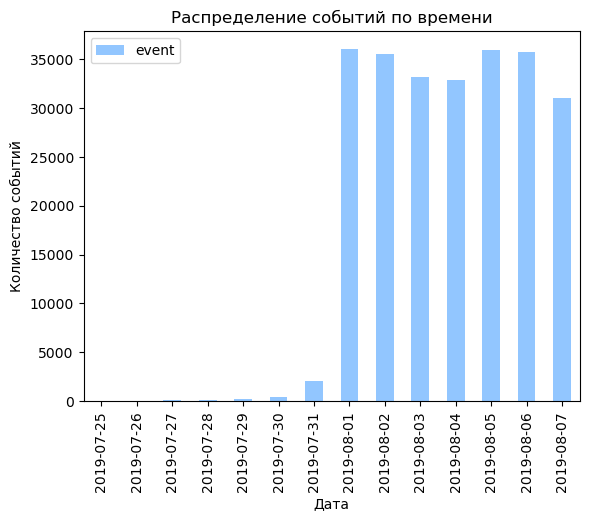

In [30]:
event_cnt = data.groupby('date')[['event']].count() #Группируем события по датам, чтобы посмотреть, как они распределены по времени

plt.style.use('seaborn-pastel'); #Выбираем стиль вихуализации
fig = plt.figure(figsize=(15, 15));
event_cnt.plot(kind='bar');

plt.title('Распределение событий по времени');
plt.xlabel('Дата');
plt.ylabel('Количество событий');

Похоже, рекламную кампанию запустили вечером 07.31. До этого по событиям очень мало данных. Наверное, имеет смысл удалить данные до начала рекламной кампании.

In [31]:
display(data)

,event,device_id,еvent_tstamp,group,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,A1,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,A1,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,B,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,B,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07


**Данными за какой период времени вы располагаете на самом деле? Много ли событий и пользователей вы потеряли, отбросив старые данные?**

In [32]:
data_check = data.query('date >= datetime(2019, 8, 1).date()') #фильтруем данные по нужному периоду
display(data_check.sort_values(by='date'))
data_check.info()
ev_check = 100 - (data_check['event'].count()/data['event'].count())*100
u_check = 100 - (len(data_check['device_id'].unique())/len(data['device_id'].unique()))*100

print('\n', "Разница между датафреймами в размере", data['event'].count()-data_check['event'].count(), 'событий.', '\n', '\n',
     'Это', ev_check.round(2), '% событий от первоначального датафрейма.')
print('\n','Будет потеряно', u_check, '% пользователей от первоначального датафрейма.')

,event,device_id,еvent_tstamp,group,date
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,A1,2019-08-01
26962,MainScreenAppear,370831337408248129,2019-08-01 15:42:06,A2,2019-08-01
26961,MainScreenAppear,8726413942744351490,2019-08-01 15:42:04,A2,2019-08-01
26960,MainScreenAppear,4933689529142781210,2019-08-01 15:42:04,A1,2019-08-01
26959,MainScreenAppear,7610224088593907423,2019-08-01 15:42:01,A1,2019-08-01
...,...,...,...,...,...
223345,PaymentScreenSuccessful,3940194724501792579,2019-08-07 10:13:38,B,2019-08-07
223344,MainScreenAppear,6086359942961042433,2019-08-07 10:13:37,A2,2019-08-07
223343,CartScreenAppear,6086359942961042433,2019-08-07 10:13:36,A2,2019-08-07
223371,OffersScreenAppear,7419223202792684248,2019-08-07 10:14:11,A2,2019-08-07


<class 'pandas.core.frame.DataFrame'>
Int64Index: 240534 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event         240534 non-null  object        
 1   device_id     240534 non-null  int64         
 2   еvent_tstamp  240534 non-null  datetime64[ns]
 3   group         240534 non-null  object        
 4   date          240534 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.0+ MB

 Разница между датафреймами в размере 2824 событий. 
 
 Это 1.16 % событий от первоначального датафрейма.

 Будет потеряно 0.2251655629139151 % пользователей от первоначального датафрейма.


Изменения датафрейма по размерам незначительно. Можно очистить датафрейм от ненужных данных.

<Figure size 1500x1500 with 0 Axes>

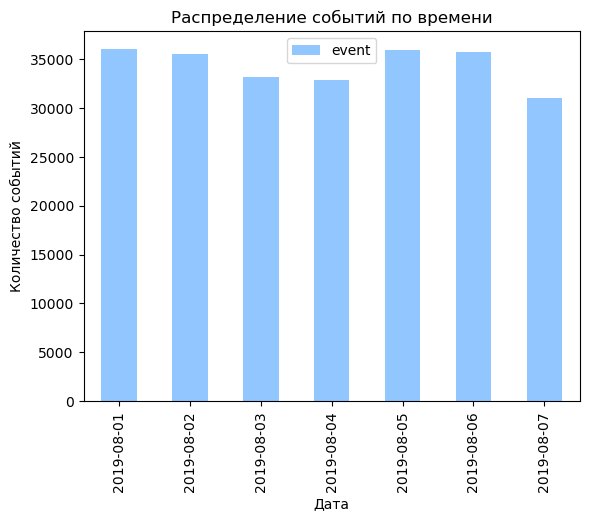

In [33]:
data = data_check #Присваиваю переменной data новый датафрейм

event_cnt = data.groupby('date')[['event']].count()


fig = plt.figure(figsize=(15, 15));
event_cnt.plot(kind='bar');#Построим новую гистограмму

plt.title('Распределение событий по времени');
plt.xlabel('Дата');
plt.ylabel('Количество событий');

### Шаг 4. Изучение и анализ воронки событий.

Построим воронку событий:

In [34]:
date_check = data.groupby('event').agg({'еvent_tstamp':'min', 'device_id':'nunique'}).reset_index()

display(date_check.sort_values(by='еvent_tstamp'))

,event,еvent_tstamp,device_id
4,Tutorial,2019-08-01 00:07:28,840
1,MainScreenAppear,2019-08-01 00:08:00,7418
2,OffersScreenAppear,2019-08-01 00:08:58,4593
0,CartScreenAppear,2019-08-01 00:14:34,3734
3,PaymentScreenSuccessful,2019-08-01 00:14:43,3536


In [35]:
# группировка таблицы по событиям
event_devices = data.groupby('event').agg({'device_id':'nunique'}).reset_index()
event_devices.set_axis(['event', 'device_cnt'], axis='columns', inplace=True)
# вычислим какой процент от общего количества пользователей составляет каждое событие
event_devices['%'] = event_devices['device_cnt'] / data['device_id'].nunique()
event_devices = event_devices.sort_values('device_cnt', ascending=False).reset_index(drop=True)

display(event_devices)

,event,device_cnt,%
0,MainScreenAppear,7418,0.984734
1,OffersScreenAppear,4593,0.609717
2,CartScreenAppear,3734,0.495686
3,PaymentScreenSuccessful,3536,0.469401
4,Tutorial,840,0.111509


Обучение проходят только 11% пользователей от общей массы. Это не удивительно, как правило, в приложениях можно пропустить этот этап. Возможно, это событие в дальнейшем можно убрать из общего расчета. 

Так же исходя из полученных данных, пользователи проходят не через все шаги воронки. Значит приложение достаточно гибкое и дружелюбное. Возможно, можно проскочить просмотр страницы предложения и добавить товар сразу в корзину. Или наоборот открыть приложение сразу на странице товара, который просматривали в последний раз. 

In [36]:
df = data.query('event != "Tutorial"') #Уберем обучение из расчетов

users = df.groupby('group')['device_id'].nunique()
users['A1_A2'] = users['A1'] + users['A2']

display(users)

# группировка таблицы по событиям
event_devices = df.groupby('event').agg({'device_id':'nunique'}).reset_index()
event_devices.set_axis(['event', 'device_cnt'], axis='columns', inplace=True)
# вычислим какой процент от общего количества пользователей составляет каждое событие
event_devices['%'] = event_devices['device_cnt'] / df['device_id'].nunique()
event_devices = event_devices.sort_values('device_cnt', ascending=False).reset_index(drop=True)

group
A1       2482
A2       2512
B        2535
A1_A2    4994
Name: device_id, dtype: int64

In [37]:
# построим воронку процента перехода пользователей на следующий шаг
event_devices['next_step'] = 1
for inx in range(1, 4):
    event_devices.loc[inx, 'next_step'] = event_devices.loc[inx, 'device_cnt'] /  (event_devices.loc[inx-1, 'device_cnt'])

display(event_devices)

,event,device_cnt,%,next_step
0,MainScreenAppear,7418,0.985257,1.000000
1,OffersScreenAppear,4593,0.610041,0.619170
2,CartScreenAppear,3734,0.495949,0.812976
3,PaymentScreenSuccessful,3536,0.469651,0.946974


Похоже, если пользователь перешел с главной страницы на страницу предложения, можно считать, что он уже "теплый клиент". Неудивительно, что нас интересует лояльность пользователя к дизайну на главной странице. 

Построим визуализацию воронки событий по пользователям:

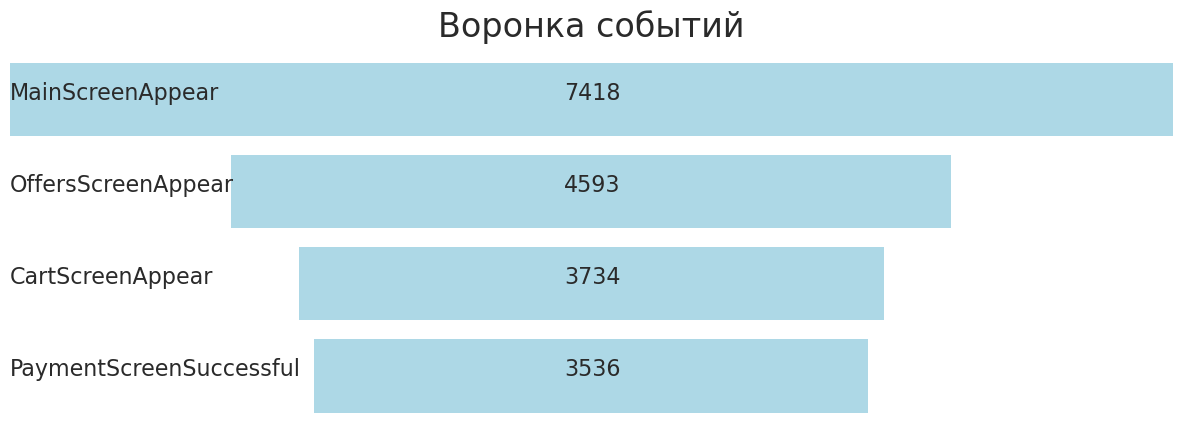

In [38]:
event_devices = event_devices.sort_values('device_cnt').reset_index(drop=True)
from matplotlib import font_manager as fm
y = event_devices['event']
x = event_devices['device_cnt']
x_max = event_devices['device_cnt'].max()
x_min = 0
labels = event_devices['event']
x_range = x_max - x_min

fig, ax = plt.subplots(figsize=(15,5))
for idx, val in enumerate(x):
    left = (x_max - val)/2
    plt.barh(y[idx], x[idx], left = left, height=.8, color = 'lightblue')
    # label
    plt.text(0, y[idx], labels[idx], ha='left', fontsize=16, color='#2A2A2A')
    #value
    plt.text(3715, y[idx], x[idx],
             fontsize=16, color='#2A2A2A').set_horizontalalignment('center')
    
plt.axis('off')
plt.title('Воронка событий', loc='center', fontsize=24, color='#2A2A2A')    
plt.xlim(x_min, x_max);


Обучение грустно сидит в сторонке:(

### Шаг 5. Анализ результатов А/А/В-экспеременета.

Для начала посмотрим, какое количество уникальных пользователей приходится на каждую группу теперь. 

In [39]:
dataA1 = df[df['group'] == 'A1']
dataA2 = df[df['group'] == 'A2']
dataB = df[df['group'] == 'B']

print(' Количество уникальных пользователей в группе А1:\n',
      dataA1.agg({'device_id':'nunique'}),"\n","\n",
      'Количество уникальных пользователей в группе A2:\n',
      dataA2.agg({'device_id':'nunique'}),"\n","\n",
      'Количество уникальных пользователей в группе B:\n',
      dataB.agg({'device_id':'nunique'}));

 Количество уникальных пользователей в группе А1:
 device_id    2482
dtype: int64 
 
 Количество уникальных пользователей в группе A2:
 device_id    2512
dtype: int64 
 
 Количество уникальных пользователей в группе B:
 device_id    2535
dtype: int64


Построим две сводные таблицы: посчитаем количество пользователей в каждой группе по событию и посчитаем количество пользователей в каждой группе по событию и дате.

In [40]:
group_date = df.pivot_table(index=['event','date'], columns='group', values='device_id', aggfunc='nunique').sort_values(by='A1', ascending=False).reset_index()
group_date['sum_device'] = group_date['A1'] + group_date['A2'] + group_date['B']
#количество людей в группе разбитые по дате и событиям.

group = df.pivot_table(index='event', columns='group', values='device_id', aggfunc='nunique').sort_values(by='A1', ascending=False).reset_index()
group['sum_device'] = group['A1'] + group['A2'] + group['B']
#количество людей в группе разбитые по событиям.

display(group_date.sort_values(by=['date', 'A1']))

group,event,date,A1,A2,B,sum_device
27,PaymentScreenSuccessful,2019-08-01,452,450,469,1371
18,CartScreenAppear,2019-08-01,497,510,503,1510
13,OffersScreenAppear,2019-08-01,656,713,681,2050
4,MainScreenAppear,2019-08-01,1140,1216,1189,3545
24,PaymentScreenSuccessful,2019-08-02,468,453,470,1391
15,CartScreenAppear,2019-08-02,513,495,517,1525
12,OffersScreenAppear,2019-08-02,687,668,715,2070
2,MainScreenAppear,2019-08-02,1144,1167,1174,3485
23,PaymentScreenSuccessful,2019-08-03,483,454,474,1411
17,CartScreenAppear,2019-08-03,504,492,508,1504


In [41]:
group['A1_A2'] = group['A1'] + group['A2']
display(group)

group,event,A1,A2,B,sum_device,A1_A2
0,MainScreenAppear,2449,2476,2493,7418,4925
1,OffersScreenAppear,1542,1520,1531,4593,3062
2,CartScreenAppear,1266,1238,1230,3734,2504
3,PaymentScreenSuccessful,1199,1156,1181,3536,2355


Думаю, для анализа будет инетерсно посмотреть визуализацию изменений по дате. 

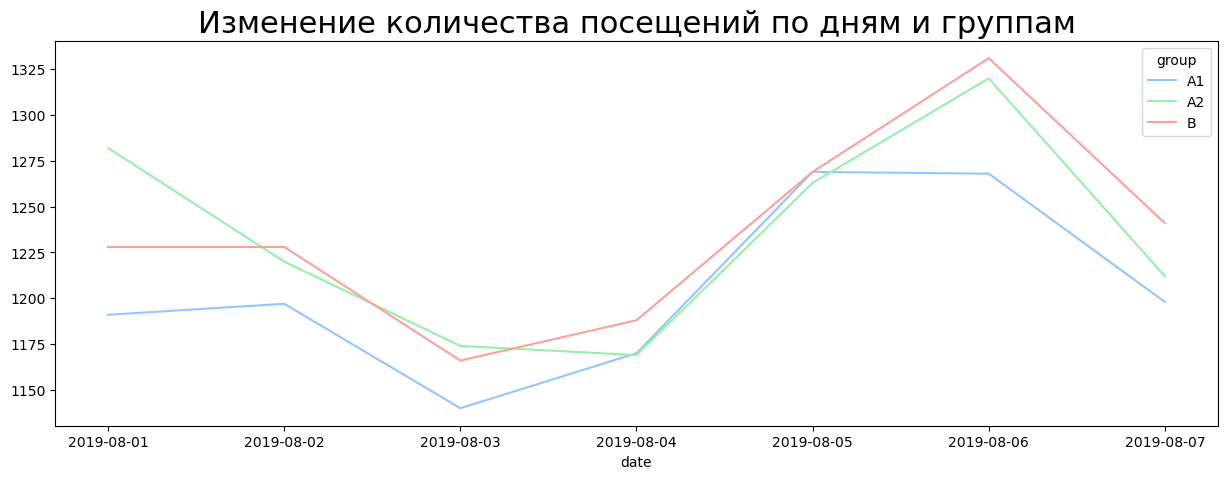

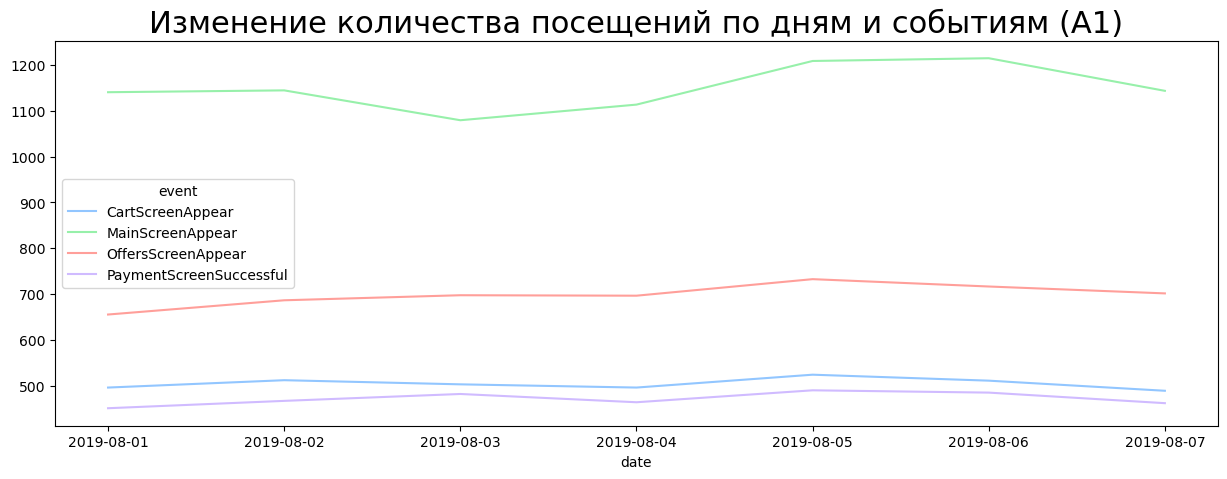

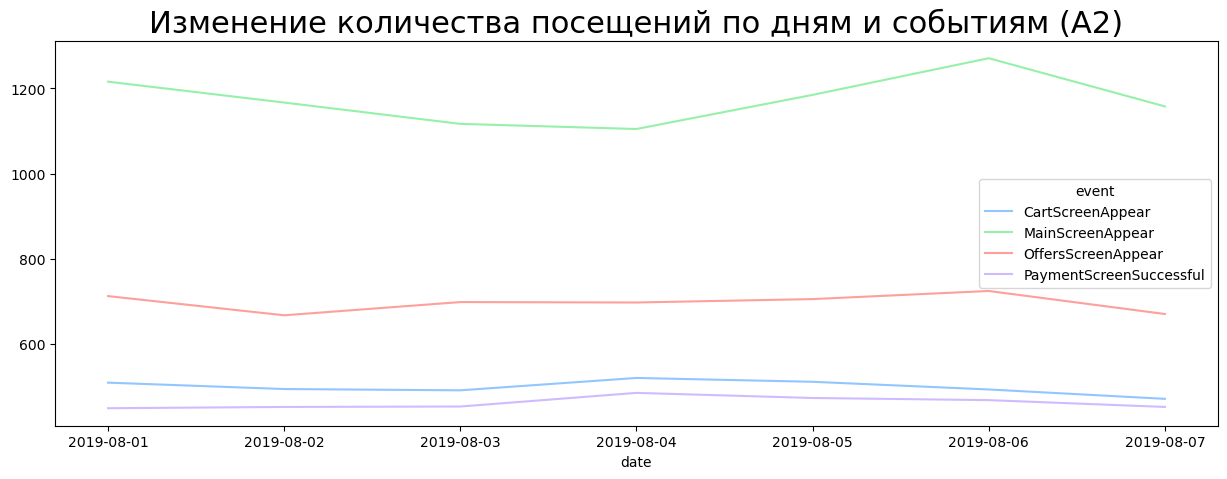

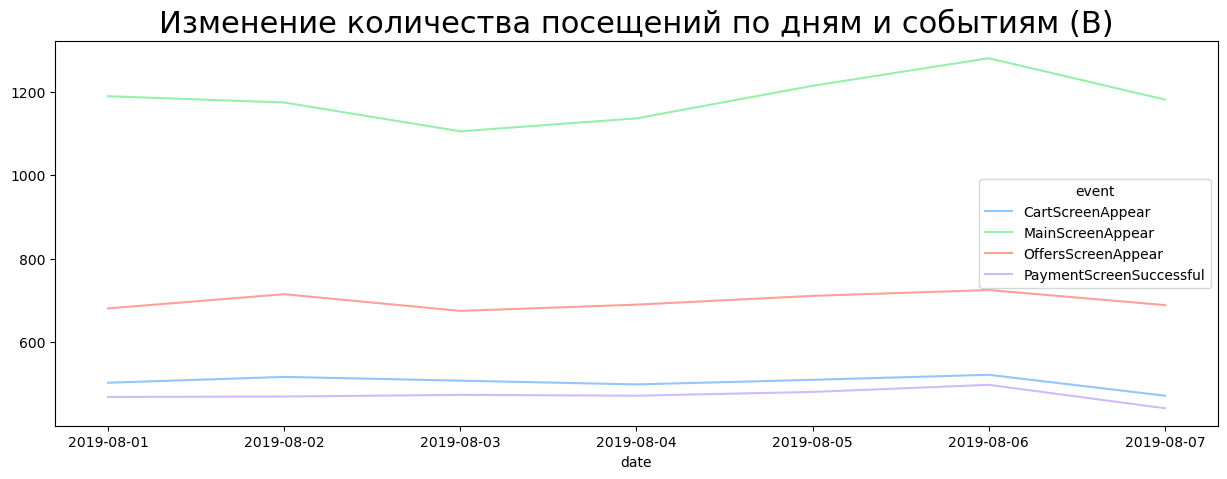

In [42]:
df1 = df.pivot_table(index=['date'], columns='group', values='device_id', aggfunc='nunique')
df2 = group_date.pivot_table(index='date', columns ='event', values = 'A1')
df3 = group_date.pivot_table(index='date', columns ='event', values = 'A2')
df4 = group_date.pivot_table(index='date', columns ='event', values = 'B')

plt1 = df1.plot(figsize=(15,5))
plt2 = df2.plot(figsize=(15,5))
plt3 = df3.plot(figsize=(15,5))
plt4 = df4.plot(figsize=(15,5))

plt1.set_title('Изменение количества посещений по дням и группам', fontsize = 22);
plt2.set_title('Изменение количества посещений по дням и событиям (A1)', fontsize = 22);
plt3.set_title('Изменение количества посещений по дням и событиям (A2)', fontsize = 22);
plt4.set_title('Изменение количества посещений по дням и событиям (B)', fontsize = 22);

Графики A1-A2-B почти одинаковые и напоминают нашу воронку. 
А вот изменения по дням и группам слегка отличаются. Мы видим выпадающие по количеству людей выходные. И то, что группа А1-слегка отличается от группы А2. Что не скажешь про разницу между группами А2 и B. Пора проверять статистическую значимость.

**Проверка статистической значимости различий между группами A1 и A2**

**0-ая гипотеза:** Статистически значимых различия в конверсии в группах A1-A2 нет.

**1-ая гипотеза:** Имеются статистически значимые различия в конверсии в группах A1-A2.

In [43]:
alpha = 0.01  # критический уровень статистической значимости
#alpha = 0.05
#alpha = 0.1

PayValA1 = group['A1'].values[3]
PayValA2 = group['A2'].values[3]
MainValA1 = group['A1'].values[0]
MainValA2 = group['A2'].values[0]

Payment = np.array([PayValA1, PayValA2])
MainScreen = np.array([MainValA1, MainValA2])

# пропорция успехов в первой группе:
p1 = Payment[0]/MainScreen[0]

# пропорция успехов во второй группе:
p2 = Payment[1]/MainScreen[1]

# пропорция успехов в комбинированном датасете:
p_comb = (Payment[0] + Payment[1]) / (MainScreen[0] + MainScreen[1])

# разница пропорций в датасетах
diff = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = diff / mth.sqrt(p_comb * (1 - p_comb) * (1 / MainScreen[0] + 1 / MainScreen[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    )

p-значение:  0.11072738287900052
Не получилось отвергнуть нулевую гипотезу


Похоже, здесь все в порядке. Несмотря на то, что в визуализации есть небольшие различия, они не значительны.

**0-ая гипотеза:** Статистически значимых различия в конверсии в группах по событиям нет.

**1-ая гипотеза:** Имеются статистически значимые различия в конверсии в группах по событиям.

In [44]:
def z(g1, g2, alpha): 
    ev1 = group.loc[event, g1]
    ev2 = group.loc[event, g2] 
    u1 = users.loc[g1] 
    u2 = users.loc[g2]
    
    # пропорция успехов в первой группе:
    p1 = ev1 / u1 
    # пропорция успехов во второй группе
    p2 = ev2 / u2 
    
    
    # пропорция успехов в комбинированном датасете
    p_comb = (ev1 + ev2) / (u1 + u2) 
    
    # разница пропорций в датасетах
    dif = p1 - p2
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = dif / mth.sqrt(p_comb * (1 - p_comb) * (1 / u1 + 1 / u2))
    
    # задаем стандартное нормальное распределение 
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:.3f}'.format(g1, g2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [45]:
for event in group.index:
    z('A2', 'A1', alpha)
    print()

Проверка для групп A2 и A1, событие: 0, p-значение: 0.754
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и A1, событие: 1, p-значение: 0.241
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и A1, событие: 2, p-значение: 0.223
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и A1, событие: 3, p-значение: 0.105
Не получилось отвергнуть нулевую гипотезу



In [46]:
for event in group.index:
    z('A1', 'B', alpha)
    print()

Проверка для групп A1 и B, событие: 0, p-значение: 0.340
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1 и B, событие: 1, p-значение: 0.208
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1 и B, событие: 2, p-значение: 0.078
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1 и B, событие: 3, p-значение: 0.223
Не получилось отвергнуть нулевую гипотезу



In [47]:
for event in group.index:
    z('A2', 'B', alpha)
    print()

Проверка для групп A2 и B, событие: 0, p-значение: 0.519
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и B, событие: 1, p-значение: 0.933
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и B, событие: 2, p-значение: 0.588
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A2 и B, событие: 3, p-значение: 0.685
Не получилось отвергнуть нулевую гипотезу



Проведем последнюю серию тестов по группам A1+A2 и B. 

**0-ая гипотеза:** Статистически значимых различия в конверсии в группах A1_A2 и B по событиям нет.

**1-ая гипотеза:** Имеются статистически значимые различия в конверсии в группах A1_A2 и B по событиям.

In [48]:
for event in group.index:
    z('A1_A2', 'B', alpha)
    print()

Проверка для групп A1_A2 и B, событие: 0, p-значение: 0.349
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1_A2 и B, событие: 1, p-значение: 0.440
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1_A2 и B, событие: 2, p-значение: 0.184
Не получилось отвергнуть нулевую гипотезу

Проверка для групп A1_A2 и B, событие: 3, p-значение: 0.640
Не получилось отвергнуть нулевую гипотезу



Все тесты подтверждают отсутствие различий в конверии по группам. У приложения довольно лояльные к изменениям пользователи. Но, похоже новый шрифт их никак не тронул.

### Вывод ###

Было совершено 12 проверок статистических гипотез. 12 - по каждому событию в трех группах с помощью z-теста. При любом выбранном критическом уровне статистической значимости, все различия незначительны. Похоже, изменение шрифта на конверсию никак не повлияло. Возможно, новый шрифт был похож на предыдущий. 

Успешны ли новые изменения? Зависит от цели добавления нового шрифта. Если цель была привлечь новых клиентов с помощью креативного шрифта - нужно проводить другие исследования. Если же цель была увеличить конверсию пользователей в покупателей, увы, цель не была достигнута. Но мы так же можем сделать вывод, что пользователи лояльно относятся к изменениям в приложении. 